# Web Scraping Job Vacancies

## Introduction

In this project, we'll build a web scraper to extract job listings from a popular job search platform. We'll extract job titles, companies, locations, job descriptions, and other relevant information.

Here are the main steps we'll follow in this project:

1. Setup our development environment
2. Understand the basics of web scraping
3. Analyze the website structure of our job search platform
4. Write the Python code to extract job data from our job search platform
5. Save the data to a CSV file
6. Test our web scraper and refine our code as needed

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and HTML structure. In addition, you may want to use the following packages in your Python environment:

- requests
- BeautifulSoup
- csv
- datetime

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install requests`
- `!pip install BeautifulSoup`

## Step 1: Importing Required Libraries

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = "https://remoteok.com/remote-data-analyst-jobs"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

In [20]:
jobs = []
for job in soup.find_all("tr", class_="job"):
    title_tag = job.find("h2", itemprop="title")
    company_tag = job.find("h3", itemprop="name")
    location_tag = job.find("div", class_="location")
    date_tag = job.find("time")
    link_tag = job.find("a", class_="preventLink")

    if title_tag and company_tag:
        jobs.append({
            "Job Title": title_tag.get_text(strip=True),
            "Company": company_tag.get_text(strip=True),
            "Location": location_tag.get_text(strip=True) if location_tag else "Not Specified",
            "Date Posted": date_tag.get_text(strip=True) if date_tag else "Not Specified",
            "Job Link": f"https://remoteok.com{link_tag['href']}" if link_tag else None
        })


In [21]:
df = pd.DataFrame(jobs)
df.to_csv("jobs.csv", index=False)

print(f"Scraped {len(df)} job postings.")
print(df.head())

Scraped 16 job postings.
                                           Job Title            Company  \
0                               Senior Data Engineer              Alqen   
1         Principal Software Engineer Data Scientist         Cardlytics   
2  Principal Software Engineer Applied Science Da...         Cardlytics   
3                           Marketing Data Scientist             Recast   
4  Machine learning engineer for large scale ML p...  OneSecondDelivery   

               Location Date Posted  \
0           🌏 Worldwide         1yr   
1  🌏 Probably worldwide         3yr   
2  🌏 Probably worldwide         4yr   
3      🇺🇸 United States         4yr   
4       💃 Latin America         4yr   

                                            Job Link  
0  https://remoteok.com/remote-jobs/remote-senior...  
1  https://remoteok.com/remote-jobs/109456-remote...  
2  https://remoteok.com/remote-jobs/109197-remote...  
3  https://remoteok.com/remote-jobs/107901-remote...  
4  https://rem

C:\Users\Istiak\AppData\Local\Temp\ipykernel_16340\2491467421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")


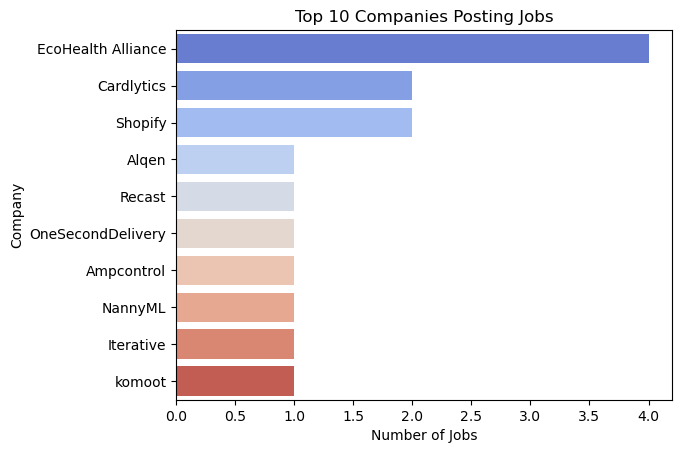

In [22]:
top_companies = df["Company"].value_counts().nlargest(10)
sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")
plt.title("Top 10 Companies Posting Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("Company")
plt.show()